# Analysis & Modeling for all Regions with SMOTE:

In [1]:
# Import libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in data:
df = pd.read_csv('../data/mmALL_073119_csv.csv')

In [3]:
# set display
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist Parti Quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Quebec protest after Queen calls for unity ...,"THE Queen, after calling on Canadians to rema..."
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100s,Mohawk Indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. Indians Gather as Siege Intensifies; Armed ...,Canada s federal government has agreed to acq...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. Dozens hurt in Mohawk blockade protest The ...,Protests were directed against the state due t...


### EDA of Worldwide Protest Activity:

In [5]:
# Engineer protest duration by total days:

df['years'] = df['endyear'] - df['startyear']
df['months'] = df['endmonth'] - df['startmonth']
df['days'] = df['endday'] - df['startday']
df['total_days'] = df['days'] + (df['months']*30.5) + (df['years']*365)

# including start day for protest duration
df['total_days'] = df['total_days'] + 1

In [6]:
# Create DataFrame for MENA Region:
df = df[df['region'] == 'MENA'].copy()

In [7]:
df['protesterdemand1'].value_counts().head(15)

political behavior, process    669
police brutality               112
removal of politician          110
price increases, tax policy     76
labor wage dispute              58
social restrictions             55
land farm issue                 13
Name: protesterdemand1, dtype: int64

In [8]:
df.groupby(['protesterdemand1','stateresponse1','protest']).count()

id  country  ccode  \
protesterdemand1            stateresponse1  protest                        
labor wage dispute          accomodation    1          9        9      9   
                            arrests         1          2        2      2   
                            beatings        1          3        3      3   
                            crowd dispersal 1          8        8      8   
                            ignore          1         28       28     28   
                            killings        1          1        1      1   
                            shootings       1          5        5      5   
land farm issue             accomodation    1          1        1      1   
                            arrests         1          3        3      3   
                            crowd dispersal 1          3        3      3   
                            ignore          1          4        4      4   
                            shootings       1          2        2      2   
police brutality            accomodation    1          5        5      5   
                            arrests         1         11       11     11   
                            beatings        1          2        2      2   
                            crowd dispersal 1         31       31     31   
                            ignore          1         50       50     50   
                            killings        1          5        5      5   
                            shootings       1          8        8      8   
political behavior, process accomodation    1         20       20     20   
                            arrests         1         50       50     50   
                            beatings        1         31       31     31   
                            crowd dispersal 1        169      169    169   
                            ignore          1        310      310    310   
                            killings        1         23       23     23   
                            shootings       1         66       66     66   
price increases, tax policy accomodation    1         13       13     13   
                            arrests         1         10       10     10   
                            beatings        1          2        2      2   
                            crowd dispersal 1         25       25     25   
                            ignore          1         13       13     13   
                            killings        1          8        8      8   
                            shootings       1          5        5      5   
removal of politician       accomodation    1          6        6      6   
                            arrests         1         11       11     11   
                            beatings        1          1        1      1   
                            crowd dispersal 1         38       38     38   
                            ignore          1         44       44     44   
                            killings        1          4        4      4   
                            shootings       1          6        6      6   
social restrictions         accomodation    1          3        3      3   
                            arrests         1          8        8      8   
                            beatings        1          4        4      4   
                            crowd dispersal 1          9        9      9   
                            ignore          1         30       30     30   

                                                     year  region  \
protesterdemand1            stateresponse1  protest                 
labor wage dispute          accomodation    1           9       9   
                            arrests         1           2       2   
                            beatings        1           3       3   
                            crowd dispersal 1           8       8   
                            ignore          1          28      28  

In [9]:
# View of total protests over entire time period in each region:
region_protests = pd.DataFrame(df.groupby(['region'])['protestnumber'].sum())
region_protests = region_protests.loc[region_protests['protestnumber'] != 0]
region_protests = region_protests.sort_values(by='protestnumber',ascending=False)
region_protests

,protestnumber
region,
MENA,7022


In [10]:
# High concentraion in Yemen
df[df['country'] == 'Yemen'].head(10)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,years,months,days,total_days
12618,6782016001,Yemen,678,2016,MENA,1,1,20.0,8.0,2016.0,20.0,8.0,2016.0,0.0,"Sabeen Square, Sanaa",>10000,Tens of thousands,Houthi Rebels,"political behavior, process",removal of politician,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,"Thousands rally for Houthi rebels, The Washing...",Tens of thousands of Yemenis rallied Saturday...,0.0,0.0,0.0,1.0
12619,6782017000,Yemen,678,2017,MENA,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12620,6782018000,Yemen,678,2018,MENA,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12621,6782019000,Yemen,678,2019,MENA,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12622,6791990001,Yemen,679,1990,MENA,1,1,22.0,3.0,1990.0,22.0,3.0,1990.0,0.0,Mukalla,NaN,100,students,social restrictions,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,"BBC Summary of World Broadcasts, March 27, 199...",According to a source at the PDRY Interior Min...,0.0,0.0,0.0,1.0
12623,6791990002,Yemen,679,1990,MENA,1,2,27.0,3.0,1990.0,27.0,3.0,1990.0,0.0,Mukalla,NaN,1000,students,social restrictions,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,"BBC Summary of World Broadcasts, March 30, 199...",Several thousand people gathered in the provin...,0.0,0.0,0.0,1.0
12624,6791990003,Yemen,679,1990,MENA,1,3,31.0,10.0,1990.0,31.0,10.0,1990.0,0.0,Sana,NaN,50,public,"price increases, tax policy",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,"NY times, November 5, 1990, Section A; Page 11...",very vague info,0.0,0.0,0.0,1.0
12625,6791991000,Yemen,679,1991,MENA,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12626,6791992001,Yemen,679,1992,MENA,1,1,9.0,12.0,1992.0,15.0,12.0,1992.0,1.0,"Sana, Ta izz",NaN,100,Sons of Yemen League,"price increases, tax policy",removal of politician,NaN,NaN,accomodation,shootings,NaN,NaN,NaN,NaN,NaN,"Independent London , December 15, 1992, INTER...",Opposition sources in Yemen said that the Pri...,0.0,0.0,6.0,7.0
12627,6791992002,Yemen,679,1992,MENA,1,2,12.0,12.0,1992.0,12.0,12.0,1992.0,0.0,Sana,NaN,50,anti government groups,"political behavior, process",NaN,NaN,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,"BBC Summary Broadcasts, December 14, 1992, Par...",A source at the Interior and Security Ministry...,0.0,0.0,0.0,1.0


In [11]:
# Examine combinations of state response and protester demand
df.groupby(['stateresponse1','protesterdemand1'])['country'].count()

stateresponse1   protesterdemand1           
accomodation     labor wage dispute               9
                 land farm issue                  1
                 police brutality                 5
                 political behavior, process     20
                 price increases, tax policy     13
                 removal of politician            6
                 social restrictions              3
arrests          labor wage dispute               2
                 land farm issue                  3
                 police brutality                11
                 political behavior, process     50
                 price increases, tax policy     10
                 removal of politician           11
                 social restrictions              8
beatings         labor wage dispute               3
                 police brutality                 2
                 political behavior, process     31
                 price increases, tax policy      2
                 re

In [12]:
# Observations where an individual protest duration was over one year
df[df['years'] > 1]

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,years,months,days,total_days
11631,6002011005,Morocco,600,2011,MENA,1,5,1.0,7.0,2011.0,24.0,1.0,2014.0,0.0,Imider,50-99,>50,"protesters, students, locals, women, villagers...","political behavior, process","price increases, tax policy",NaN,NaN,killings,NaN,NaN,NaN,NaN,NaN,NaN,"On Moroccan Hill, Villagers Make Stand Agains...","EXACT DATES ARE NOT PROVIDED, BUT CODED BASED ...",3.0,-6.0,23.0,936.0


In [13]:
# Same display where duration is over 1 month:
df[df['months'] > 1].sort_values(by='months',ascending=False).head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,years,months,days,total_days
12431,6522011003,Syria,652,2011,MENA,1,3,18.0,3.0,2011.0,3.0,12.0,2012.0,1.0,National,NaN,10000s,NaN,"political behavior, process",removal of politician,police brutality,NaN,killings,shootings,beatings,crowd dispersal,arrests,accomodation,NaN,Security Forces Restrained As Syrian Protests ...,"Protests began locally in Daraa, Damscus, Bani...",1.0,9.0,-15.0,625.5
12313,6512010001,Egypt,651,2010,MENA,1,1,1.0,2.0,2010.0,28.0,6.0,2010.0,0.0,Cairo,NaN,10000,labor,labor wage dispute,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,"NY Times, June 28, 2010, Section A; Column 0; ...","Day after day, hundreds of workers from all o...",0.0,4.0,27.0,150.0
11643,6002017002,Morocco,600,2017,MENA,1,2,29.0,5.0,2017.0,27.0,8.0,2017.0,1.0,al Hoceima,100-999,100,Hirak Chaabi,police brutality,NaN,NaN,NaN,arrests,crowd dispersal,NaN,NaN,NaN,NaN,NaN,"1. 50 protesters arrested, The Times Londo...",Moroccan police arrested about 50 protesters ...,0.0,3.0,-2.0,90.5
11773,6162017002,Tunisia,616,2017,MENA,1,2,14.0,3.0,2017.0,28.0,5.0,2017.0,1.0,El Kamour,5000-10000,thousands,youth,"political behavior, process",NaN,NaN,NaN,crowd dispersal,beatings,NaN,NaN,NaN,NaN,NaN,1. Rioting youths confront police in Tunisia...,A 20 year old protester died after being knoc...,0.0,2.0,14.0,76.0
12152,6402018017,Turkey,640,2018,MENA,1,17,21.0,7.0,2018.0,30.0,9.0,2018.0,0.0,Istanbul,50-99,50,residents,land farm issue,NaN,NaN,.,ignore,NaN,NaN,NaN,.,NaN,NaN,"Displaced Turks, Promised New Homes, Can Only...",A group of residents have been protesting fo...,0.0,2.0,9.0,71.0


### Barcharts for Visual Analysis of Number of Protests, Duration & Categories:

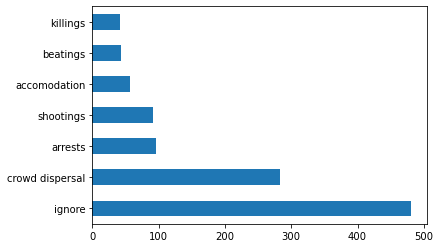

In [14]:
# Value Counts method for categorical features:
df['stateresponse1'].value_counts().plot(kind='barh');

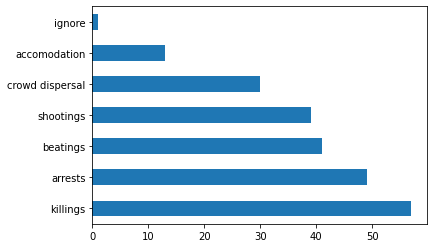

In [15]:
df['stateresponse2'].value_counts().plot(kind='barh');

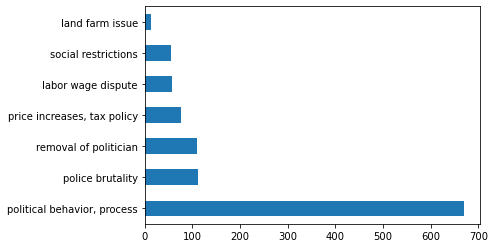

In [16]:
df['protesterdemand1'].value_counts().plot(kind='barh');

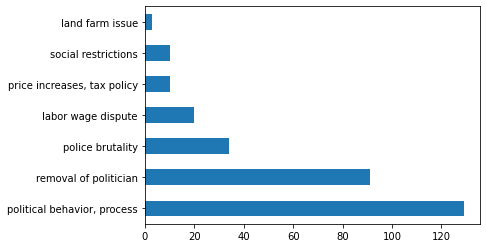

In [17]:
df['protesterdemand2'].value_counts().plot(kind='barh');

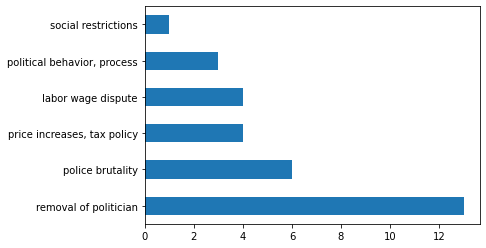

In [18]:
df['protesterdemand3'].value_counts().plot(kind='barh');

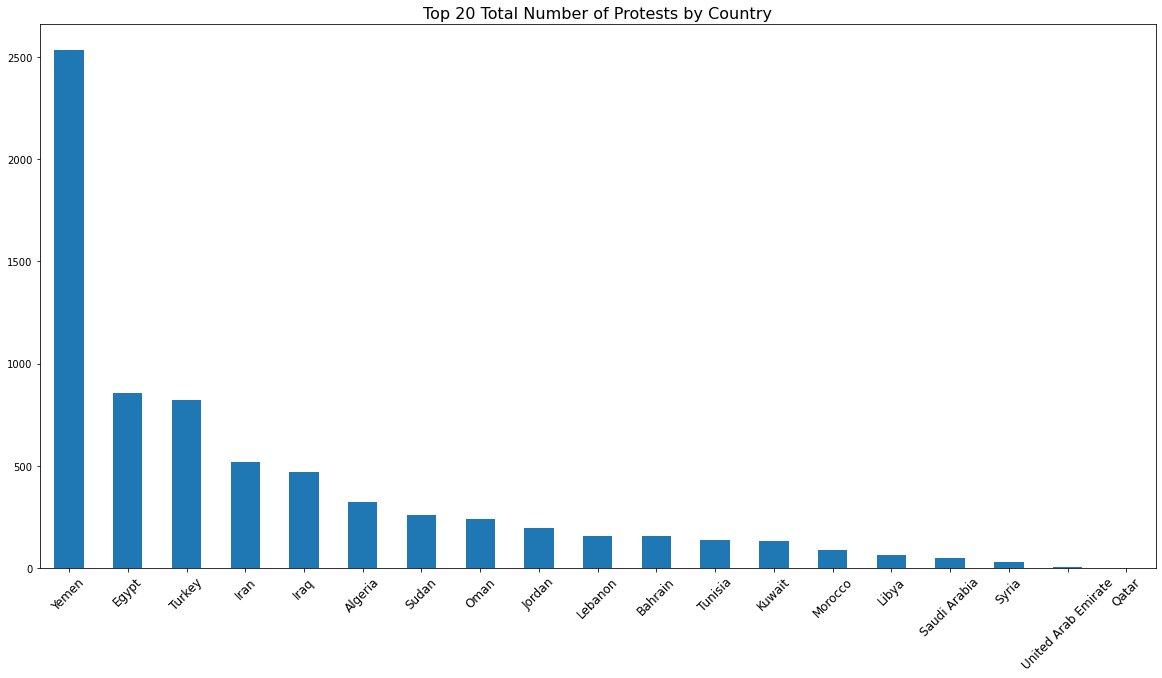

In [19]:
# Examine greatest total number of protests by individual country worldwide:
plt.figure(figsize=(20,10))
df.groupby('country').sum().sort_values(by='protestnumber',ascending=False)['protestnumber'].head(20).plot(kind='bar')
plt.title('Top 20 Total Number of Protests by Country',size=16)
plt.xlabel(None)
plt.xticks(rotation=45,size=12);

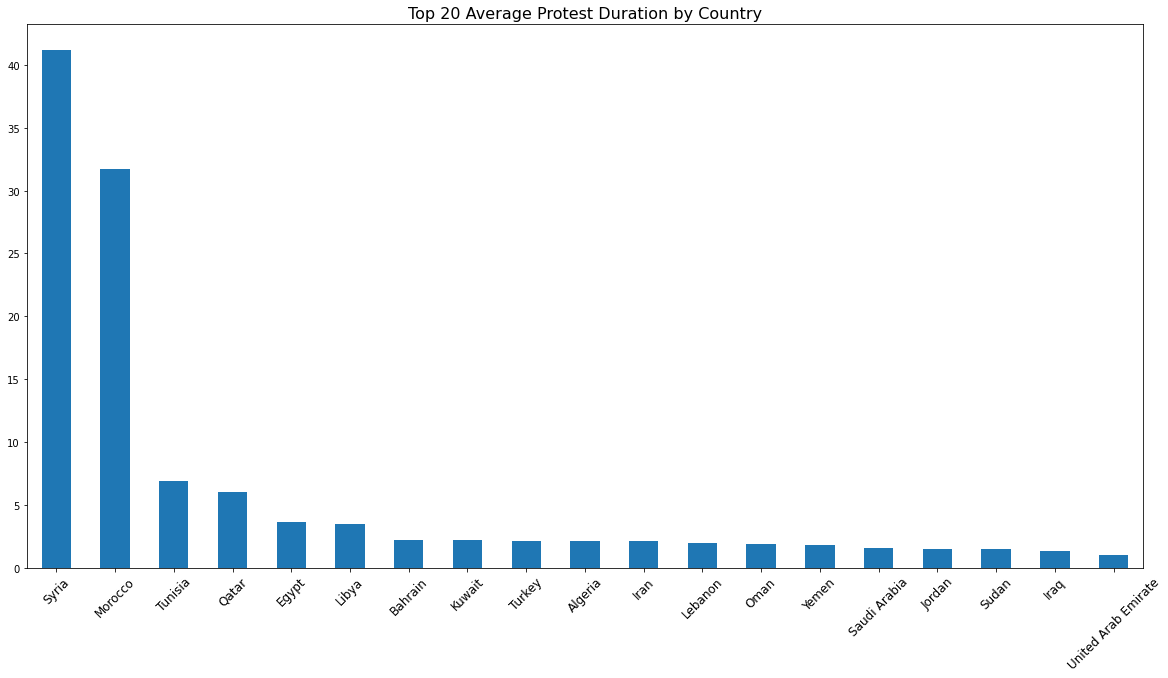

In [20]:
# Same chart with higest average protest duration in days by each individual country.
plt.figure(figsize=(20,10))
df.groupby('country').mean().sort_values(by='total_days',ascending=False)['total_days'].head(20).plot(kind='bar')
plt.title('Top 20 Average Protest Duration by Country',size=16)
plt.xlabel(None)
plt.xticks(rotation=45,size=12);

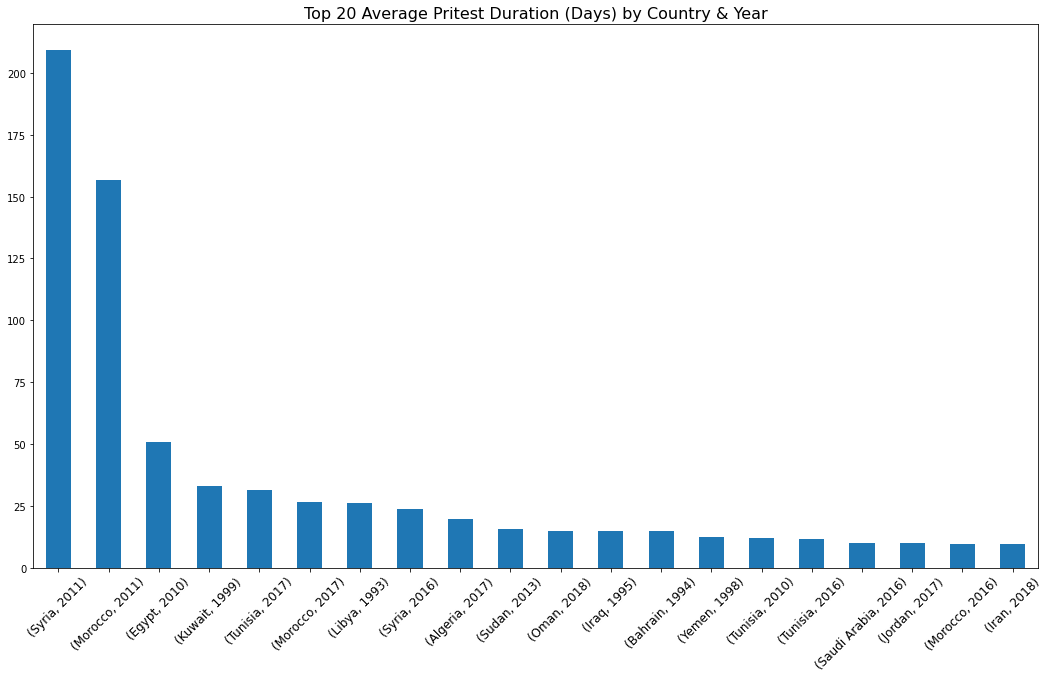

In [21]:
plt.figure(figsize=(18,10))
df.groupby(['country','year'])['total_days'].mean().sort_values(ascending=False).head(20).plot.bar()
plt.title('Top 20 Average Pritest Duration (Days) by Country & Year',size=16)
plt.xlabel(None)
plt.xticks(rotation=45,size=12);

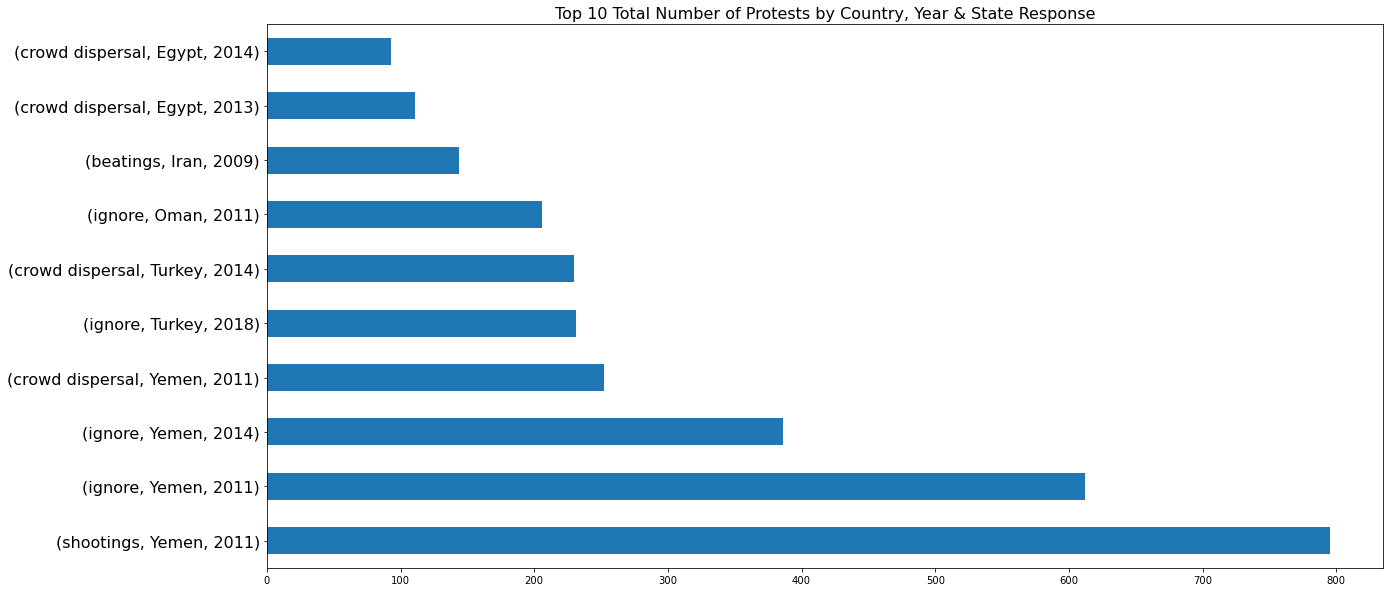

In [22]:
plt.figure(figsize=(20,10))
df.groupby(['stateresponse1','country','year'])['protestnumber'].sum().sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Total Number of Protests by Country, Year & State Response',size=16)
plt.ylabel(None)
plt.yticks(size=16);

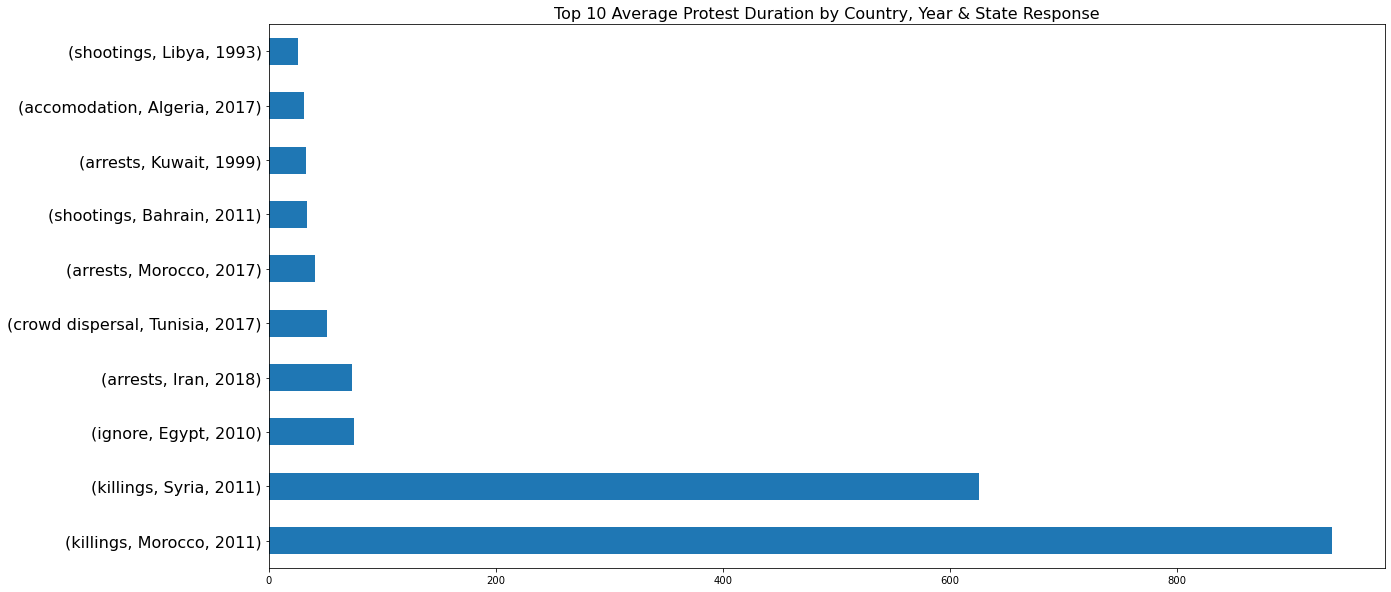

In [23]:
plt.figure(figsize=(20,10))
df.groupby(['stateresponse1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Average Protest Duration by Country, Year & State Response',size=16)
plt.ylabel(None)
plt.yticks(size=16);

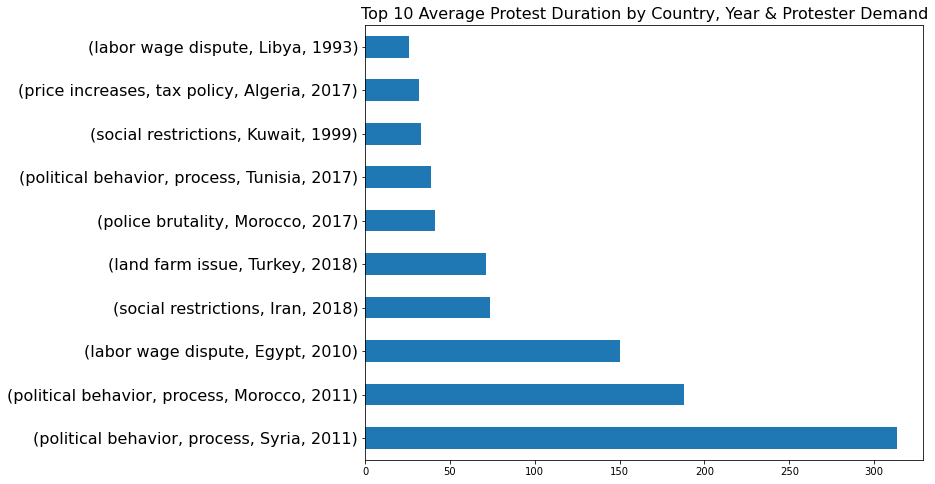

In [24]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Average Protest Duration by Country, Year & Protester Demand',size=16)
plt.ylabel(None)
plt.yticks(size=16);

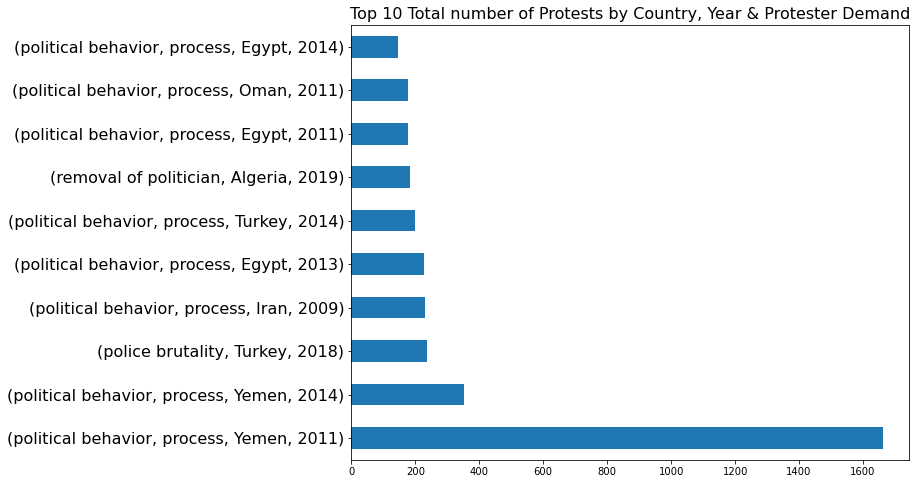

In [25]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','country','year'])['protestnumber'].sum().sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Total number of Protests by Country, Year & Protester Demand',size=16)
plt.ylabel(None)
plt.yticks(size=16);

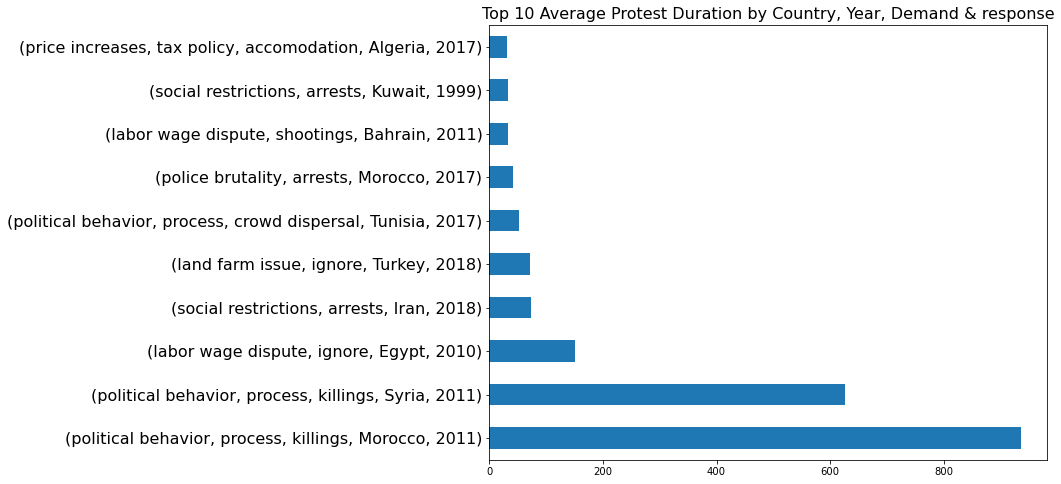

In [26]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','stateresponse1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Average Protest Duration by Country, Year, Demand & response',size=16)
plt.ylabel(None)
plt.yticks(size=16);

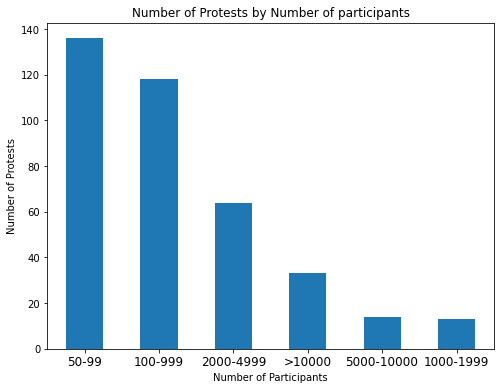

In [27]:
plt.figure(figsize=(8,6))
df['participants_category'].value_counts().plot(kind='bar')
plt.title('Number of Protests by Number of participants')
plt.ylabel('Number of Protests')
plt.xlabel('Number of Participants')
plt.xticks(size=12,rotation=0);

### Processing for Models:

In [28]:
# Examine null values
df.isnull().sum()

id                          0
country                     0
ccode                       0
year                        0
region                      0
protest                     0
protestnumber               0
startday                  314
startmonth                314
startyear                 314
endday                    314
endmonth                  314
endyear                   314
protesterviolence          54
location                  318
participants_category    1032
participants               55
protesteridentity         491
protesterdemand1          317
protesterdemand2         1113
protesterdemand3         1379
protesterdemand4         1293
stateresponse1            317
stateresponse2           1180
stateresponse3           1326
stateresponse4           1379
stateresponse5           1287
stateresponse6           1407
stateresponse7           1342
sources                   315
notes                     317
years                     314
months                    314
days      

In [29]:
# Combine all distinct response and demand features into one feature each
# Credit to Jenn Williamson for Function & Solution

protest_demands = ['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4']
state_responses = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
                   'stateresponse5', 'stateresponse6', 'stateresponse7']

def get_dum_cols(df, list_of_columns):
    list_of_dfs = []
    
    for col in list_of_columns:
        col_df = pd.get_dummies(df[col])
        list_of_dfs.append(col_df)
        
    #combine all df's vertically, so only areas with null values are where a potential column was empty    
    dfs_concat = pd.concat(list_of_dfs, axis = 0).fillna(0)
    
    #convert the concatenated df with all values now filled in into a list of separate dfs - each with all columns
    num_dfs = len(list_of_columns)
    num_rows = len(df)
    list_of_final_dfs = []
    
    for i in range(num_dfs):
        new_df = dfs_concat[num_rows*i : num_rows*(i+1)]
        list_of_final_dfs.append(new_df)
        
    # create combined final df
    final_df = list_of_final_dfs[0]
    
    for j in range(1, len(list_of_final_dfs)):
        final_df += list_of_final_dfs[j]
    return final_df

# Apply above function:
response_cats = get_dum_cols(df,state_responses)
demand_cats = get_dum_cols(df,protest_demands)

# Combine newly arranged response and demand features to original DataFrame:
df = pd.concat([df,demand_cats,response_cats],axis=1)
df = df[df['protest'] == 1].copy()

# Drop irrelevant columns anf fill null values:
df.drop(columns=['id','sources','notes'],inplace=True)
df.fillna(0,inplace=True)

# Binarize target feature
df['accomodation'] = np.where(df['accomodation'] == 1,1,0)

'''These features were also ascertained to not be useful for model predictions 
due to the way they were formatted in the native dataset.'''

remove_features = ['ccode','startyear','endyear','startday',
                   'endday','protest','years','months','days',
                  'participants','protesteridentity','location',
                   'country','endmonth','stateresponse1',
                   'stateresponse2','stateresponse3','stateresponse4',
                   'stateresponse5','stateresponse6','stateresponse7',
                  'protesterdemand1','protesterdemand2',
                'protesterdemand3','protesterdemand4','year']

# Encode features with manageable amounts of categories:
dummy_columns = ['region','startmonth','participants_category']

# Final drop and encoding of features:
df = df.drop(columns=remove_features)
df = pd.get_dummies(df,columns=dummy_columns)

# Removing final null values for target column integrity:
df.dropna(inplace=True)

### Modeling & Analysis:

In [30]:
# Classification & Ensemble Models are among the imports:

# Processing:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Model & Metrics Inventory:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, plot_confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score 

# SMOTE for significantly imbalanced binary classes:
from imblearn.over_sampling import SMOTE

In [31]:
# Arrange X and y arrays:
X = df.drop(columns='accomodation')
y = df['accomodation']

# TTS with stratification of target:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=77)

# Display baseline accuracy:
y.value_counts(normalize=True)

0    0.918796
1    0.081204
Name: accomodation, dtype: float64

In [32]:
# Verify selected features:
X_train.head(1)

,protestnumber,protesterviolence,total_days,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,.,arrests,beatings,crowd dispersal,ignore,killings,shootings,.,region_MENA,startmonth_1.0,startmonth_2.0,startmonth_3.0,startmonth_4.0,startmonth_5.0,startmonth_6.0,startmonth_7.0,startmonth_8.0,startmonth_9.0,startmonth_10.0,startmonth_11.0,startmonth_12.0,participants_category_0,participants_category_100-999,participants_category_1000-1999,participants_category_2000-4999,participants_category_50-99,participants_category_5000-10000,participants_category_>10000
12877,4,0.0,1.0,0.0,0.0,0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Synthetic rebalancing of classes (Binary) & Modeling:

In [33]:
# Initialize SMOTE object:
smote = SMOTE()

# Rebalance training data for X and y:
Xsm_train, ysm_train = smote.fit_sample(np.array(X_train),np.array(y_train))

In [34]:
# GridSearch for Logistic Regression:
# Note: Model is fit on rebalanced data:

log_params = {'penalty':['l2'],
              'max_iter':[500,1000,1500],
              'C':[0.01,0.3,0.5,1,5]}

logreg = GridSearchCV(LogisticRegression(),
                     log_params,
                     cv=5,
                     verbose=1)

logreg.fit(Xsm_train,ysm_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   10.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.3, 0.5, 1, 5],
                         'max_iter': [500, 1000, 1500], 'penalty': ['l2']},
             verbose=1)

In [35]:
# Compare train and test scores:
logreg.score(Xsm_train,ysm_train), logreg.score(X_test,y_test)

(0.8516556291390729, 0.8467153284671532)

In [36]:
# Basic Decision Tree Model:
dtc = DecisionTreeClassifier()
dtc.fit(Xsm_train,ysm_train)

DecisionTreeClassifier()

In [37]:
# Compare scores:
dtc.score(Xsm_train,ysm_train), dtc.score(X_test,y_test)

(0.9993377483443708, 0.927007299270073)

In [38]:
# GridSearch for KNN Model:
knn_params = {'n_neighbors':[3,4,5,6],
             'weights':['uniform','distance'],
             'p':[2,3,4]}

knn = GridSearchCV(KNeighborsClassifier(),
                     knn_params,
                     cv=5,
                     verbose=1)

knn.fit(Xsm_train,ysm_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    3.6s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6], 'p': [2, 3, 4],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [39]:
# Compare scores:
knn.score(Xsm_train,ysm_train), knn.score(X_test,y_test)

(0.9993377483443708, 0.8175182481751825)

In [40]:
# GridSearch for Random Forest:
rfc_params = {'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2'],
             'oob_score':[True,False],
             'ccp_alpha':[0.01,0.05,0.07]}

rfc = GridSearchCV(RandomForestClassifier(),
                     rfc_params,
                     cv=5,
                     verbose=1)

rfc.fit(Xsm_train,ysm_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   37.7s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.01, 0.05, 0.07],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'oob_score': [True, False]},
             verbose=1)

In [41]:
# Compare scores:
rfc.score(Xsm_train,ysm_train), rfc.score(X_test,y_test)

(0.9841059602649007, 0.9635036496350365)

In [42]:
# GridSearch for AdaBoost:

ada_params = {'n_estimators':[40,50,60],
             'learning_rate':[0.5,1,1.5]}

ada = GridSearchCV(AdaBoostClassifier(),
                     ada_params,
                     cv=5,
                     verbose=1)

ada.fit(Xsm_train,ysm_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1, 1.5],
                         'n_estimators': [40, 50, 60]},
             verbose=1)

In [43]:
# Compare scores:
ada.score(Xsm_train,ysm_train), ada.score(X_test,y_test)

(0.9562913907284768, 0.9197080291970803)

In [44]:
# Model prediction inventory for respective Metrics:
preds_lr = logreg.predict(X_test)
preds_dtc = dtc.predict(X_test)
preds_knn = knn.predict(X_test)
preds_rfc = rfc.predict(X_test)
preds_ada = ada.predict(X_test)

### Metrics:

Logistic Regression precision:  0.3148148148148148
Logistic Regression sensitivity:  0.7727272727272727
Logistic Regression specificity:  0.8531746031746031
Logistic Regression accuracy:  0.8467153284671532


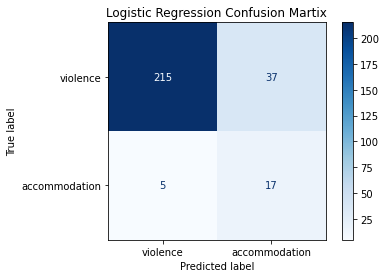

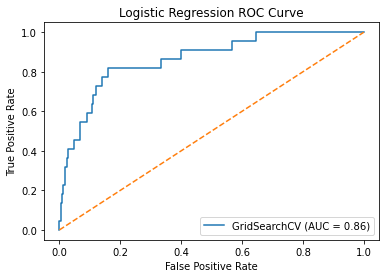

In [45]:
# Produce Metrics - Display Confusion Matrix, Classification Scores & ROC Cruve for each model:

tn, fp, fn, tp = confusion_matrix(y_test,preds_lr).ravel()

plot_confusion_matrix(logreg,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['violence','accommodation'])
plt.title('Logistic Regression Confusion Martix')

print('Logistic Regression precision: ',tp / (tp + fp))
print('Logistic Regression sensitivity: ',tp / (tp + fn))
print('Logistic Regression specificity: ',tn / (tn + fp))
print('Logistic Regression accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(logreg,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('Logistic Regression ROC Curve')
plt.legend;

Decision Tree precision:  0.5384615384615384
Decision Tree sensitivity:  0.6363636363636364
Decision Tree specificity:  0.9523809523809523
Decision Tree accuracy:  0.927007299270073


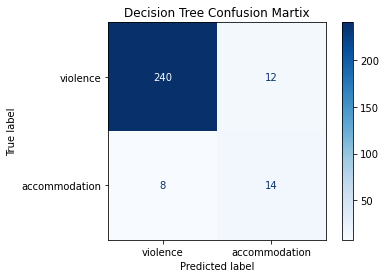

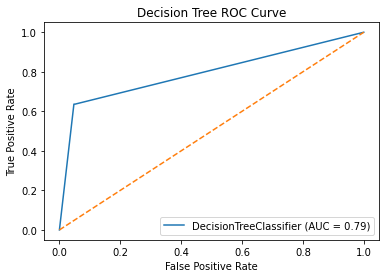

In [46]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_dtc).ravel()

plot_confusion_matrix(dtc,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['violence','accommodation'])
plt.title('Decision Tree Confusion Martix')

print('Decision Tree precision: ',tp / (tp + fp))
print('Decision Tree sensitivity: ',tp / (tp + fn))
print('Decision Tree specificity: ',tn / (tn + fp))
print('Decision Tree accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(dtc,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('Decision Tree ROC Curve')
plt.legend;

KNN precision:  0.25
KNN sensitivity:  0.6363636363636364
KNN specificity:  0.8333333333333334
KNN accuracy:  0.8175182481751825


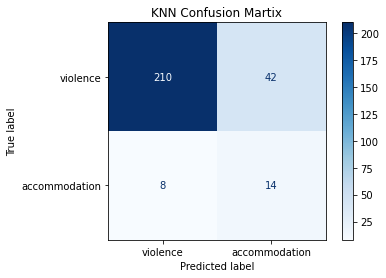

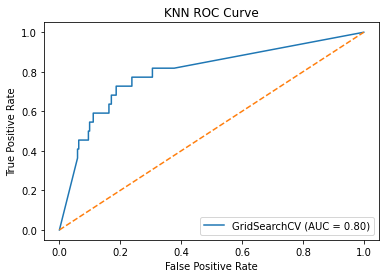

In [47]:
# Random Forest Model appeared to perform the best after classes were rebalanced.
tn, fp, fn, tp = confusion_matrix(y_test,preds_knn).ravel()

plot_confusion_matrix(knn,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['violence','accommodation'])
plt.title('KNN Confusion Martix')

print('KNN precision: ',tp / (tp + fp))
print('KNN sensitivity: ',tp / (tp + fn))
print('KNN specificity: ',tn / (tn + fp))
print('KNN accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(knn,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('KNN ROC Curve')
plt.legend;

Random Forest precision:  1.0
Random Forest sensitivity:  0.5454545454545454
Random Forest specificity:  1.0
Random Forest accuracy:  0.9635036496350365


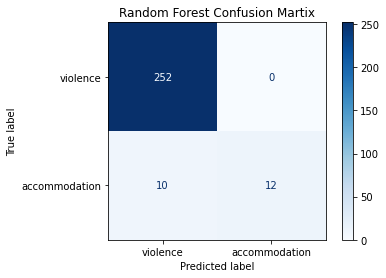

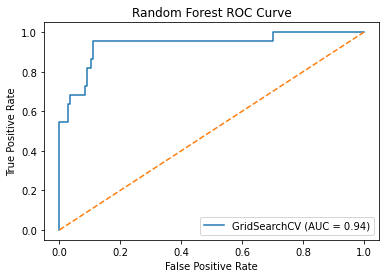

In [48]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_rfc).ravel()

plot_confusion_matrix(rfc,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['violence','accommodation'])
plt.title('Random Forest Confusion Martix')

print('Random Forest precision: ',tp / (tp + fp))
print('Random Forest sensitivity: ',tp / (tp + fn))
print('Random Forest specificity: ',tn / (tn + fp))
print('Random Forest accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(rfc,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('Random Forest ROC Curve')
plt.legend;

AdaBoost precision:  0.5
AdaBoost sensitivity:  0.36363636363636365
AdaBoost specificity:  0.9682539682539683
AdaBoost accuracy:  0.9197080291970803


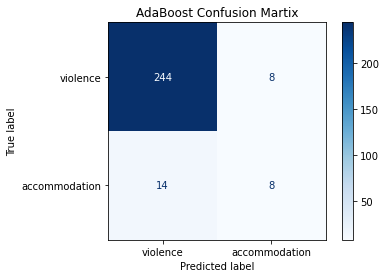

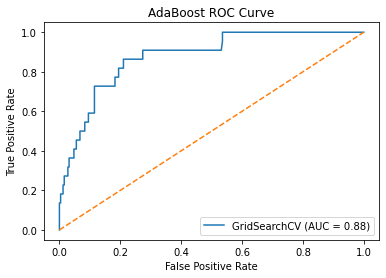

In [49]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_ada).ravel()

plot_confusion_matrix(ada,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['violence','accommodation'])
plt.title('AdaBoost Confusion Martix')

print('AdaBoost precision: ',tp / (tp + fp))
print('AdaBoost sensitivity: ',tp / (tp + fn))
print('AdaBoost specificity: ',tn / (tn + fp))
print('AdaBoost accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(ada,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('AdaBoost ROC Curve')
plt.legend;